in this we use ocr to extract content frome income statement image, it can be used for any document too(pdf), easyocr is neural network tool and reader for reading,easyocr supports other languages too

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [2]:
!wget https://i.pinimg.com/564x/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg

--2023-05-15 17:43:32--  https://i.pinimg.com/564x/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.32.29.105, 23.32.29.88, 2600:1413:b000:1b::17d7:70e, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.32.29.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40003 (39K) [image/jpeg]
Saving to: ‘ee407ede9d8e0d4d869f8d3e81d1b28d.jpg’

ee407ede9d8e0d4d869 100%[===================>]  39.07K  --.-KB/s    in 0.001s  

2023-05-15 17:43:32 (32.3 MB/s) - ‘ee407ede9d8e0d4d869f8d3e81d1b28d.jpg’ saved [40003/40003]



In [3]:
import easyocr
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

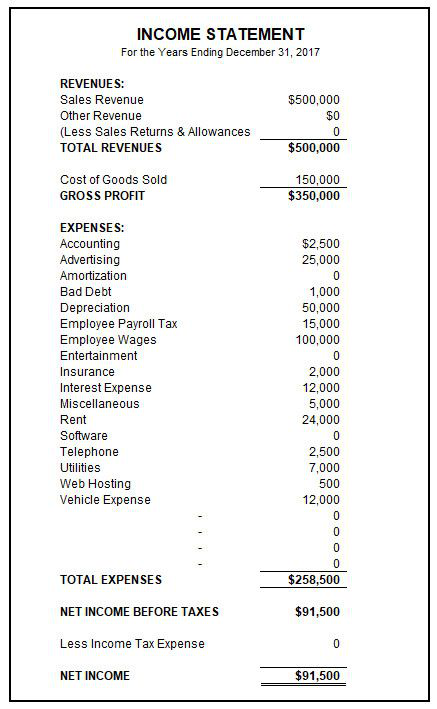

In [4]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("ee407ede9d8e0d4d869f8d3e81d1b28d.jpg")
im

In [5]:
bounds = reader.readtext('ee407ede9d8e0d4d869f8d3e81d1b28d.jpg')
bounds

[([[132, 22], [308, 22], [308, 46], [132, 46]],
  'INCOME STATEMENT',
  0.9993400144798115),
 ([[119, 47], [157, 47], [157, 59], [119, 59]], 'For the', 0.9453908407779147),
 ([[165, 45], [323, 45], [323, 61], [165, 61]],
  'ears Ending Cecember 31, 2017',
  0.6668123755738243),
 ([[59, 77], [127, 77], [127, 91], [59, 91]], 'REVENUES:', 0.8777984631363535),
 ([[59, 93], [147, 93], [147, 107], [59, 107]],
  'Sales Revenue',
  0.9983567305484514),
 ([[287, 93], [343, 93], [343, 107], [287, 107]],
  'S500,00O',
  0.34800211874049886),
 ([[59, 109], [145, 109], [145, 125], [59, 125]],
  'Other Revenue',
  0.9998853993819552),
 ([[59, 125], [177, 125], [177, 139], [59, 139]],
  '(Less Sales Returns',
  0.7556484622985364),
 ([[187, 125], [253, 125], [253, 139], [187, 139]],
  'Allowances',
  0.8234690432669352),
 ([[59, 141], [165, 141], [165, 155], [59, 155]],
  'TOTAL REVENUES',
  0.9963322671789049),
 ([[287, 141], [343, 141], [343, 155], [287, 155]],
  'S500,000',
  0.8117501654604468),


in above extraction was not little fine we try to make it better by adding hyperparameters

now we draw bounding box to get better results

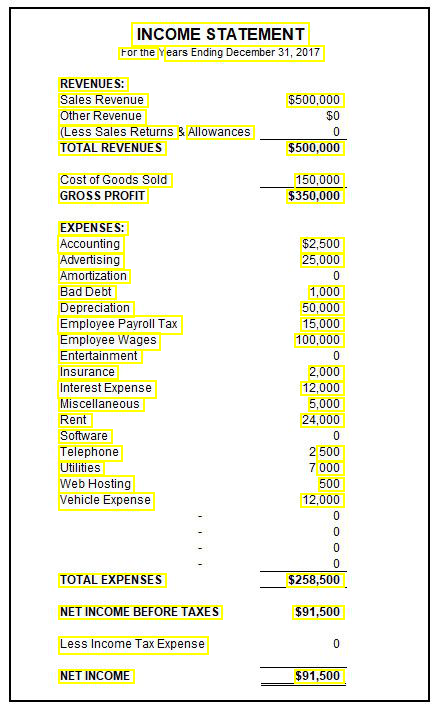

In [6]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

contrast threshold if was 0.05 changed or adjusted to 0.7 by default,margin uses 0.1, the yellow color bounding box is expanded in order to increase width,width threshold merges bounding boxes,beamsearch scans document twice,there do exists gridsearch

In [7]:
bounds = reader.readtext('ee407ede9d8e0d4d869f8d3e81d1b28d.jpg', contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45, width_ths=0.7, decoder='beamsearch')
bounds

[([[125, 15], [315, 15], [315, 53], [125, 53]],
  'INCOME STATEMENT ',
  0.31976984001928116),
 ([[116, 44], [160, 44], [160, 62], [116, 62]],
  'For the`',
  0.7528176781340463),
 ([[160, 40], [328, 40], [328, 66], [160, 66]],
  'rears Ending December 31,2017',
  0.9866792971786776),
 ([[55, 73], [131, 73], [131, 95], [55, 95]], 'REVENUES:', 0.9996391606637451),
 ([[55, 89], [151, 89], [151, 111], [55, 111]],
  'Sales Revenue',
  0.995682095955282),
 ([[283, 89], [347, 89], [347, 111], [283, 111]],
  'ss00,0o0',
  0.18959203828093307),
 ([[54, 104], [150, 104], [150, 130], [54, 130]],
  '~Other Revenue',
  0.7235408463309912),
 ([[321, 105], [347, 105], [347, 127], [321, 127]], 'S0', 0.27250680708213665),
 ([[55, 121], [181, 121], [181, 143], [55, 143]],
  '(Less Sales Returns E',
  0.7497887420593955),
 ([[183, 121], [257, 121], [257, 143], [183, 143]],
  'Alowances',
  0.6892230460202975),
 ([[55, 137], [169, 137], [169, 159], [55, 159]],
  'TOTAL REVENUES',
  0.9838632247933361),
 

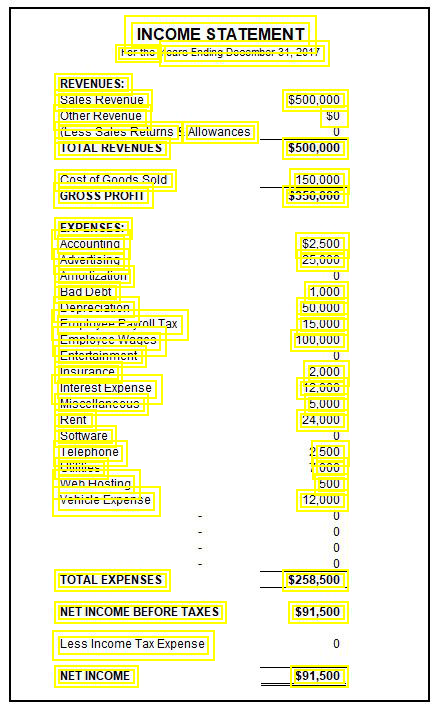

In [8]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [9]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,223 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [10]:
! apt install libtesseract.dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libtesseract.dev
E: Couldn't find any package by glob 'libtesseract.dev'


In [11]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pytesseract
import requests
from io import BytesIO
import cv2
import numpy as np
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [13]:
extractedInformation = pytesseract.image_to_string(Image.open('ee407ede9d8e0d4d869f8d3e81d1b28d.jpg'))

In [14]:
print(extractedInformation)

 

 

INCOME STATEMENT

For the Years Ending December 31, 2017

REVENUES:
Sales Revenue
Other Revenue

(Less Sales Returns & Allowances

TOTAL REVENUES

Cost of Goods Sold
GROSS PROFIT

EXPENSES:
Accounting
Advertising
Amortization

Bad Debt
Depreciation
Employee Payroll Tax
Employee Wages
Entertainment
Insurance

Interest Expense
Miscellaneous

Rent

Software

Telephone

Ultities

Web Hosting

Vehicle Expense

TOTAL EXPENSES
NET INCOME BEFORE TAXES
Less Income Tax Expense

NET INCOME

$500,000
80
0

$500,000

150,000

$350,000

$2,500
25,000
0

4,000
50,000
15,000
100,000
0

2,000
42,000
5,000
24,000
0

2,500
7,000
500
42,000

 

$91,500

 

 

 



In [15]:
config = 'digits'

image = cv2.imread("ee407ede9d8e0d4d869f8d3e81d1b28d.jpg")
img_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#print(pytesseract.image_to_string(img_RGB))

results = pytesseract.image_to_boxes(img_RGB)
ih, iw, ic = image.shape
for box in results.splitlines():
    box = box.split(' ')
    print(box)

    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv2.rectangle(image, (x, ih-y), (w, ih-h), (0, 255, 0), 2)
    cv2.putText(image, box[0], (x, ih-h), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1)

# results = pytesseract.image_to_data(img_RGB)
# for id, line in enumerate(results.splitlines()):
#
#     if id != 0:
#         line = line.split()
#         if len(line) == 12:
#             x, y, w, h = int(line[6]), int(line[7]), int(line[8]), int(line[9])
#             cv2.rectangle(image, (x, y), (w+x, h+y), (0, 255, 0), 2)
#             cv2.putText(image, line[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

cv2.imshow("Input", image)
cv2.waitKey(0)

['~', '9', '699', '430', '703', '0']
['~', '8', '7', '12', '702', '0']
['I', '138', '669', '140', '681', '0']
['N', '142', '669', '152', '681', '0']
['C', '154', '669', '164', '681', '0']
['O', '166', '669', '176', '681', '0']
['M', '178', '669', '189', '681', '0']
['E', '191', '669', '200', '681', '0']
['S', '207', '669', '215', '681', '0']
['T', '217', '669', '227', '681', '0']
['A', '226', '669', '237', '681', '0']
['T', '238', '669', '257', '681', '0']
['E', '244', '669', '264', '681', '0']
['M', '259', '669', '270', '681', '0']
['E', '272', '669', '281', '681', '0']
['N', '283', '669', '293', '681', '0']
['T', '295', '669', '305', '681', '0']
['F', '115', '643', '125', '671', '0']
['o', '122', '653', '127', '661', '0']
['r', '128', '653', '137', '659', '0']
['t', '140', '653', '143', '661', '0']
['h', '141', '643', '146', '671', '0']
['e', '144', '653', '155', '661', '0']
['Y', '158', '653', '166', '661', '0']
['e', '162', '643', '172', '671', '0']
['a', '167', '653', '172', '659'

DisabledFunctionError: ignored

In [18]:
!pip install gTTs


from gtts import gTTs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

In [19]:
from gtts import *

In [20]:
from gtts import gTTS
import os

# read image using cv2.imread() method
#rev = cv2.imread("Reviews\\15.PNG")

# display the image using cv2.imshow() method
# cv2.imshow("Image", rev)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# grab the text from image using pytesseract
#txt = pytesseract.image_to_string(rev)
#print(txt)

# set language
language = 'en'

# create a gTTS object
outObj = gTTS(text=extractedInformation, lang=language, slow=False)

# Save the audio file as rev.mp3
outObj.save("rev.mp3")

# play the .mp3 file
print('playing the audio file')
os.system('rev.mp3')

playing the audio file


32512